# Spam Classifier
## Assignment Preamble
Please ensure you carefully read all of the details and instructions on the assignment page, this section, and the rest of the notebook. If anything is unclear at any time please post on the forum or ask a tutor well in advance of the assignment deadline.

In addition to all of the instructions in the body of the assignment below, you must also follow the following technical instructions for all assignments in this unit. *Failure to do so may result in a grade of zero.*
* [At the bottom of the page](#Submission-Test) is some code which checks you meet the submission requirements. You **must** ensure that this runs correctly before submission.
* Do not modify or delete any of the cells that are marked as test cells, even if they appear to be empty.
* Do not duplicate any cells in the notebook – this can break the marking script. Instead, insert a new cell (e.g. from the menu) and copy across any contents as necessary.

Remember to save and backup your work regularly, and double-check you are submitting the correct version.

This notebook is the primary reference for your submission. You may write code in separate `.py` files but it must be clearly imported into the notebook so that it runs without needing to reference those files, and you must explain clearly what functionality is contained in those files (through comments, markdown cells, etc).

As always, **the work you submit for this assignment must be entirely your own.** Do not copy or work with other students. Do not copy answers that you find online. These assignments are designed to help improve your understanding first and foremost – the process of doing the assignment is part of *learning*. They are also used to assess your ability, and so you must uphold academic integrity. Submitting plagiarised work risks your entire place on your degree.

**The pass mark for this assignment is 40%.** We expect that students, on average, will be able to produce a submission which gets a mark between 50-70% within the normal workload allocation for the unit, but this will vary depending on individual backgrounds. Please ask for help if you are struggling.

## Getting Started
Spam refers to unwanted email, often in the form of advertisements. In the literature, an email that is **not** spam is called *ham*. Most email providers offer automatic spam filtering, where spam emails will be moved to a separate inbox based on their contents. Of course this requires being able to scan an email and determine whether it is spam or ham, a classification problem. This is the subject of this assignment.

This assignment has two parts. Each part is worth 50% of the overall grade for this assignment.

For part one you will write a supervised learning based classifier to determine whether a given email is spam or ham. You must write and submit the code in this notebook. The training data is provided for you. You may use any classification method. Marks will be awarded primarily based on the accuracy of your classifier on unseen test data, but there are also marks for estimating how accurate you think your classifier will be.

In part two you will produce a short video explaining your implementation, any decisions or extensions you made, and what parameter values you used. This part is explained in more detail on the assignment page. The video file must be submitted with your assignment.

### Choice of Algorithm
While the classification method is a completely free choice, the assignment folder includes [a separate notebook file](data/naivebayes.ipynb) which can help you implement a Naïve Bayes solution. If you do use this notebook, you are still responsible for porting your code into *this* notebook for submission. A good implementation should give a high  enough accuracy to get a good grade on this section (50-70%).

You could also consider a k-nearest neighbour algorithm, but this may be less accurate. Logistic regression is another option that you may wish to consider.

If you are looking to go beyond the scope of the unit, you might be interested in building something more advanced, like an artificial neural network. This is possible just using `numpy`, but will require significant self-directed learning. *Extensions like this are left unguided and are not factored into the unit workload estimates.*

**Note:** you may use helper functions in libraries like `numpy` or `scipy`, but you **must not** import code which builds entire models for you. This includes but is not limited to use of libraries like `scikit-learn`, `tensorflow`, or `pytorch` – there will be plenty of opportunities for these libraries in later units. The point of this assignment is to understand code the actual algorithm yourself. ***If you are in any doubt about any particular library or function please ask a tutor.*** Submissions which ignore this will receive penalties or even zero marks.

If you choose to implement more than one algorithm, please feel free to include your code and talk about it in part two (your video presentation), but only the code in this notebook will be used in the automated testing.

## Training Data
The training data is described below and has 1000 rows. There is also a 500 row set of test data. These are functionally identical to the training data, they are just in a separate csv file to encourage you to split out your training and test data. You should consider how to best make use of all available data without overfitting, and to help produce an unbiased estimate for your classifier's accuracy.

The cell below loads the training data into a variable called `training_spam`.

In [1]:
import numpy as np

training_spam = np.loadtxt(open("data/training_spam.csv"), delimiter=",").astype(np.int)
print("Shape of the spam training data set:", training_spam.shape)
print(training_spam)

Your training set consists of 1000 rows and 55 columns. Each row corresponds to one email message. The first column is the _response_ variable and describes whether a message is spam `1` or ham `0`. The remaining 54 columns are _features_ that you will use to build a classifier. These features correspond to 54 different keywords (such as "money", "free", and "receive") and special characters (such as ":", "!", and "$"). A feature has the value `1` if the keyword appears in the message and `0` otherwise.

As mentioned there is also a 500 row set of *test data*. It contains the same 55 columns.

In [2]:
testing_spam = np.loadtxt(open("data/testing_spam.csv"), delimiter=",").astype(np.int)
print("Shape of the spam testing data set:", testing_spam.shape)
print(testing_spam)

## Part One
Write all of the code for your classifier below this cell. There is some very rough skeleton code in the cell directly below. You may insert more cells below this if you wish, but you must not duplicate any cells as this can break the grading script.

### Submission Requirements
Your code must provide a variable with the name `classifier`. This object must have a method called `predict` which takes input data and returns class predictions. The input will be a single $n \times 54$ numpy array, your classifier should return a numpy array of length $n$ with classifications. There is a demo in the cell below, and a test you can run before submitting to check your code is working correctly.

Your code must run on our test machine in under 30 seconds. If you wish to train a more complicated model (e.g. neural network) which will take longer, you are welcome to save the model's weights as a file and then load these in the cell below so we can test it. You must include the code which computes the original weights, but this must not run when we run the notebook – comment out the code which actually executes the routine and make sure it is clear what we need to change to get it to run. Remember that we will be testing your final classifier on additional hidden data.

Epoch 200: training Score = [[0.24164788]]
Epoch 400: training Score = [[0.22154441]]
Epoch 600: training Score = [[0.21582629]]
Epoch 800: training Score = [[0.21292771]]
Epoch 1000: training Score = [[0.21108713]]
Epoch 1200: training Score = [[0.20977297]]
Epoch 1400: training Score = [[0.20876653]]
Epoch 1600: training Score = [[0.20796166]]


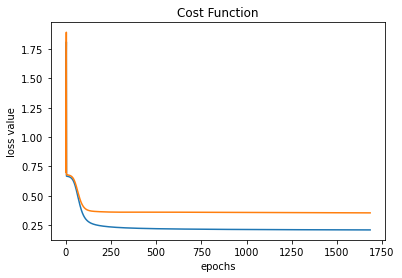

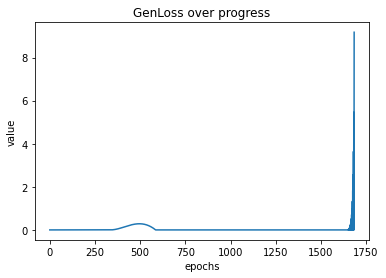

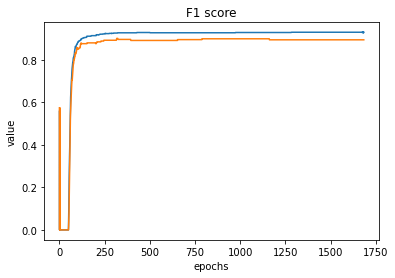

Training time: 25.984375 seconds
Training cost = [[0.22617458]], Epochs = 318, Training Accuracy = 0.944, Validation Accuracy = 0.9233333333333333


In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import itertools


class SpamClassifier:
    def __init__(self,alpha=2,beta=10, type="LR", net=[55, 55, 1], verbose=False):
        self.verbose = verbose
        self.theta = []
        self.type = type
        if type == "LR":
            self.name = 'Logistic regression'
            self.net = [0, 0, 0]
        else:
            self.name = 'Neural Net'
            self.net = net
        self.alpha = alpha  # learning rate
        self.beta = beta    # regularization  factor  (10 best seen so far)
        self.train_cost = 0

    def train(self, data, data_eval):
        Y = data[:, 0:1]  # labels (training set)
        X = data[:, 1:]  # features only  (training set)
        Y_eval = data_eval[:, 0:1]  # labels (evaluation set)
        X_eval = data_eval[:, 1:]  # features only (evaluation set)
        X_bias = np.concatenate((np.ones((np.shape(X)[0], 1)).astype(np.int8), X), axis=1)  # adding constant bias to the features
        X_eval_bias = np.concatenate((np.ones((np.shape(X_eval)[0], 1)).astype(np.int8), X_eval), axis=1)  # adding constant bias to the features
        t_start = time.process_time()
        if self.type == 'LR':  # Logistic Regression
            theta = np.zeros((np.shape(X_bias)[1], 1)).astype(np.float_)  # initialize weights + bias term
            self.theta, train_cost,epochs = gradient_descent_LR(X_bias, theta, Y, self.alpha, self.beta, self.verbose)  # optimize the hyposis weight
            accuracy = accuracy_score(self.predict_LR(X_bias, add_bias=False), Y)  # bias term has already been added
            accuracy_eval = 0
        elif self.type == 'NN':  # Neural Network
            self.theta = self.Intialize_Theta() # initialize network weights
            self.theta, train_cost, epochs = gradient_descent_NN(self, X_bias, Y, self.theta, X_eval_bias, Y_eval, self.verbose)  # optimize the network weight
            accuracy = accuracy_score(self.predict_NN(X_bias, add_bias=False), Y) # calculate accuracy on the training data
            accuracy_eval = accuracy_score(self.predict_NN(X_eval_bias, add_bias=False), Y_eval)  # calculate accurancy on the evaluation data
        self.train_cost = train_cost
        t_elapsed = time.process_time() - t_start
        if self.verbose:
            print(f"Training time: {t_elapsed} seconds")
            print(f"Training cost = {self.train_cost}, Epochs = {epochs}, Training Accuracy = {accuracy}, Validation Accuracy = {accuracy_eval}")

    def Intialize_Theta(self):
        np.random.seed(1)
        net = self.net
        theta_vect_list = []
        for i in range(len(net) - 1):
            nParam = (net[i] + 1) * net[i + 1]
            eps = np.sqrt(6) / np.sqrt(net[i] + net[i + 1])
            #theta_vect_list.append(np.random.rand(nParam, 1) * 2 * eps - eps)
            theta_vect_list.append(np.random.rand(nParam, 1) * 0.01)
        theta_vect = np.concatenate(theta_vect_list, axis=0)
        np.random.seed(None)
        return theta_vect

    def predict(self, data):
        if self.type == "LR":
            predictions = self.predict_LR(data)
        else:
            predictions = self.predict_NN(data)
        predictions = predictions.reshape(max(predictions.shape))
        return predictions

    def predict_LR(self, data, add_bias=True):
        # predict method for Linear Regression
        if add_bias:
            data = np.concatenate((np.ones((np.shape(data)[0], 1)).astype(np.int8), data), axis=1)
        z_pred = np.matmul(data, self.theta)
        y = sigmoid(z_pred)
        predictions = np.zeros((y.shape[0], 1)).astype(np.int_)
        idx_positive = y >= 0.5
        predictions[idx_positive] = 1
        return predictions

    def predict_NN(self, data, theta=None, add_bias=True):
        # predict method for Neural Networks
        if theta is None:
            theta = self.theta
        # data must be without lables
        m_theta = reshapeVect(theta, self.net)
        if add_bias:
            data = np.concatenate((np.ones((np.shape(data)[0], 1)).astype(np.int8), data), axis=1)
        predictions = np.zeros((data.shape[0], 1)).astype(np.int_)
        A, _ = forward_prop(data, m_theta)  # A = list of vectors of activation function values for each layer
        pred = A[-1]
        predictions = predictions + 1 * (pred.T >= 0.5)
        return predictions

    def __lt__(self, other):
        return self


def gradient_descent_LR(X, theta, Y, alpha, beta, verbose=False):
    # gradient descent for Lorgistic Regression
    delta_cost = math.inf
    cost = math.inf
    max_err = 1e-8
    iter_num = 0
    cost_history = []
    epoch_max = 2000
    # for i in range(iter_max):
    while delta_cost > max_err:
    #while delta_cost > max_err:
        iter_num += 1
        new_cost, grad, train_cost = CostFunction_LR(X, theta, Y, beta)
        # theta_i = theta_0 + alpha * d_J/d_theta
        theta = theta - alpha * grad
        delta_cost = abs(new_cost - cost)
        cost = new_cost
        cost_history.append(delta_cost)  # will comment out this before submitting as it slows down the alogorthm
    if verbose:
        print(f"Number of iterations of Gradiant Descent = {iter_num}")
        plt.plot(range(iter_num), cost_history)
        plt.show()
    return theta, train_cost, iter_num


def f1_score(pred,Y):
    tp, tn, fp, fn = confusion_matrix(pred, Y)
    f1 = tp / (tp + 0.5 * (fp + fn))
    return f1


def accuracy_score(pred,Y):
    accuracy = np.sum(pred == Y)/len(pred)
    return accuracy


def confusion_matrix(pred,Y):
    yp = Y == 1
    tp = np.sum(pred[yp] == Y[yp])
    fn = np.sum(pred[yp] != Y[yp])
    yn = Y == 0
    tn = np.sum(pred[yn] == Y[yn])
    fp = np.sum(pred[yn] != Y[yn])
    return tp, tn, fp, fn


def gradient_descent_NN(model, X, Y, theta ,X_eval, Y_eval, verbose=False):
    # gradient descent for Neural Net
    validate_gradient = False
    pq_max = 6
    epoch = 0
    cost_history = []
    epoch_max = 2000
    patience_factor = 50
    # initiliaze the performance metric vectors
    F1_train = np.array([])
    F1_eval = np.array([])
    ACC_eval = np.array([])
    ACC_train = np.array([])
    train_loss_vect = np.array([])
    eval_loss_vect = np.array([])
    gen_loss_vect = np.array([])
    pq_vect = np.array([])
    learn_slope_vect = np.array([])
    
    theta_buffer = theta
    score_buffer = 0
    epoch_buffer = 0
    f1_eval_buffer = 0
    k = 5
    while epoch < epoch_max:
        epoch += 1
        if verbose and epoch % 200 == 0:
            print(f"Epoch {epoch}: training Score = {train_loss}")
        # calculate the cost function value and its gradient with respect the weights
        new_cost, grad, train_loss = CostFunction_NN(X, theta, Y, model.beta, model.net)
        # calculate the cost function value on the evaluation set
        _, _, eval_loss = CostFunction_NN(X_eval, theta, Y_eval, model.beta, model.net)
        # calculate performance metrics for training and validation set
        train_loss_vect = np.append(train_loss_vect, train_loss[0])
        eval_loss_vect = np.append(eval_loss_vect, eval_loss[0])
        prediction_training = model.predict_NN(X, theta, add_bias=False)
        f1_training = f1_score(prediction_training, Y)
        F1_train = np.append(F1_train, f1_training)
        prediction_eval = model.predict_NN(X_eval, theta, add_bias=False)
        f1_eval = f1_score(prediction_eval, Y_eval)
        F1_eval = np.append(F1_eval, f1_eval)
        accuracy_eval = accuracy_score(prediction_eval, Y_eval)
        accuracy_train = accuracy_score(prediction_training, Y)
        ACC_eval = np.append(ACC_eval, accuracy_eval)
        ACC_train = np.append(ACC_train, accuracy_train)
        gen_loss_vect = np.append(gen_loss_vect, 0)
        pq_vect= np.append(pq_vect, 0)
        learn_slope_vect = np.append(learn_slope_vect, 1000)
        if epoch > patience_factor:
            # progress factor
            learn_slope = (np.sum(train_loss_vect[epoch-k-1:epoch-1])/(k*min(train_loss_vect[epoch-k-1:epoch-1])) - 1) * 1000
            learn_slope_vect[epoch-1] = learn_slope
            # generalization loss
            gloss = (eval_loss / min(eval_loss_vect) - 1) * 100
            gen_loss_vect[epoch-1] = gloss
            # generalization loss over progress
            pq = gloss / learn_slope
            pq_vect[epoch-1] = pq
            if F1_eval[epoch-1] > f1_eval_buffer:
                # store the weights which produce the best F1 score.
                f1_eval_buffer = F1_eval[epoch-1]
                theta_buffer = theta
                score_buffer = train_loss
                epoch_buffer = epoch
            if pq > pq_max:  # stop the training process when the generalization loss over the progress is above 6%
                break
        if validate_gradient:
            # run gradient cheking to make sure back prop works correctly
            cost_fun = lambda w: CostFunction_NN(X, w, Y, model.beta, model.net)
            check_gradient(theta, cost_fun, grad)
        theta = theta - model.alpha * grad  # update theta
        cost = new_cost
        cost_history.append(cost)  # will comment out this before submitting as it slows down the alogorithm

    theta_best = theta_buffer
    epoch_best = epoch_buffer
    train_cost_best = score_buffer
    if verbose:
        #  plot cost function trends for training and evaluation data
        plt.plot(np.array(range(F1_eval.shape[0])), train_loss_vect)
        plt.plot(np.array(range(F1_eval.shape[0])), eval_loss_vect)
        plt.title("Cost Function")
        plt.xlabel("epochs")
        plt.ylabel("loss value")
        plt.show()
        # plot the trend of the PQ term
        #plt.plot(np.array(range(F1_eval.shape[0])), gen_loss_vect)
        plt.plot(np.array(range(F1_eval.shape[0])), pq_vect)
        plt.title("GenLoss over progress")
        plt.xlabel("epochs")
        plt.ylabel("value")
        plt.show()
        # plot the trend of the F1 score
        plt.plot(np.array(range(F1_eval.shape[0])), F1_train)
        plt.plot(np.array(range(F1_eval.shape[0])), F1_eval)
        plt.title("F1 score")
        plt.xlabel("epochs")
        plt.ylabel("value")
        plt.show()
    return theta_best, train_cost_best, epoch_best


def CostFunction_LR(X, theta, Y, beta=1):
    # X = m x n+1 matrix where m  = number of training examples and n is the number of feature
    # theta = n+1 x 1 vector
    # Y =  m x 1 vector
    m = np.shape(X)[0]
    L = np.eye(theta.shape[0])
    L[0, 0] = 0
    theta_reg = theta
    theta_reg[0, 0] = 0
    z = np.matmul(X, theta)
    cost = -1 / m * np.sum(+np.log(sigmoid(z)) * Y + np.log(1-sigmoid(z)) * (1-Y)) + beta/2/ m * np.sum(np.power(theta_reg, 2))  # this is a scalar
    train_cost = -1 / m * np.sum(+np.log(sigmoid(z)) * Y + np.log(1-sigmoid(z)) * (1-Y))
    # the gradiant must be a vector of size (n+1) x 1
    grad = 1 / m * np.matmul(X.T, sigmoid(z) - Y) + beta/m * np.matmul(L, theta)
    return cost, grad, train_cost


def CostFunction_NN(X, thetaVect, Y, beta, net):
    m_theta = reshapeVect(thetaVect, net)
    m = X.shape[0]
    layers = len(net)
    D_list = [np.zeros(theta.shape) for theta in m_theta]
    # forward prop (also computes the cost)
    A, Z = forward_prop(X, m_theta)   # A = list of vectors of activation function values for each layer
    h = A[-1]  # output prediction
    cost = -np.log(h) @ Y - np.log(1-h) @ (1-Y)  # cross entropy loss
    # back prop()
    delta = back_prop(Y, A, m_theta)
    # update deltas
    for i in range(layers):
        if i == layers - 1:
            break
        # calculating the partial derivatives of the cost function with respects the net weights
        D_list[i] = D_list[i] + A[i] @ delta[i+1][1:].T
    train_cost = cost
    for i in range(len(m_theta)):
        I = np.eye(m_theta[i].shape[0])
        I[0, 0] = 0
        D_list[i] = 1/m * (D_list[i] + beta * (I @ m_theta[i]))  # gradients regularization term
        cost += beta/2 * np.sum((I @ np.power(m_theta[i], 2)) @ np.ones((m_theta[i].shape[1], 1)))  # cost function regularization term
    train_cost = train_cost/m
    cost = cost / m
    D_list_flat = [np.reshape(d, (d.shape[0] * d.shape[1], 1)) for d in D_list]
    grad_vect = np.concatenate(D_list_flat, axis=0)  # flatten the gradiant matrices to one vector
    return cost, grad_vect, train_cost


def reshapeVect(thetaVect,net):
    #  Reshape the gradients vector into L-1 matrices of size  n(ly)+1 x n(ly+1) where n(lY) is the mumber of neurons in layer ly
    point = 0
    m_theta = [[] for _ in range(len(net)-1)]
    for lyr, neurons in enumerate(net):
        if lyr == len(net)-1:
            continue
        next_lyr_neurons = net[lyr+1]
        elements = (neurons+1) * next_lyr_neurons
        m_theta[lyr] = np.reshape(thetaVect[point : point+elements], (neurons+1, next_lyr_neurons))  # +1 to take care of the bias
        point += elements
    return m_theta


def forward_prop(X, m_theta):
    # Forward propagation: calculates the values of the activation function for each neurons in each layer
    layers = len(m_theta) + 1
    A = [[] for _ in range(layers)]
    Z = [[] for _ in range(layers)]
    A[0] = X.T
    for lyr_num in range(1, layers):
        Z[lyr_num] = np.matmul(m_theta[lyr_num-1].T, A[lyr_num-1])
        A[lyr_num] = sigmoid(Z[lyr_num])
        if lyr_num < layers-1:  # add the bias term to al layers except the last
            A[lyr_num] = np.insert(A[lyr_num], 0, 1, axis=0)
    return A, Z


def back_prop(Y, A, m_theta):
    # Back propagation: calculate the "errors" in each layer
    layers = len(m_theta)+1
    delta = [[] for _ in range(layers)]
    delta[-1] = np.insert(A[layers-1] - Y.T, 0, 1, axis=0)
    for lyr_num in reversed(range(layers-1)):
        delta_no_bias = delta[lyr_num+1][1:]  # remove the bias
        delta[lyr_num] = np.matmul(m_theta[lyr_num], delta_no_bias) * A[lyr_num]*(1-A[lyr_num])
    return delta


def sigmoid(z):
    # Neurons activation function
    s = 1 / (1 + np.exp(-z))
    return s


def check_gradient(theta, LossFun, grad):
    # compare the gradiant calculated by means of forward and back prop with respect to a numerical grediant.
    # this is to check that the implementation of forward and back prop is correct
    theta_new = theta.copy
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    eps = 1e-7
    for p in range(len(theta)):
        perturb[p] = eps
        loss1, _, _ = LossFun(theta - perturb)
        loss2, _, _ = LossFun(theta + perturb)
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2 * eps)
        perturb[p] = 0
        deltagrad = numgrad[p] - grad[p]
        if deltagrad > 1e-7:
            print("Gradient is Wrong")
        print(f"Idx = {p}, grad = {grad[p]}, numeric grad = {numgrad[p]}. Difference = {grad[p] - numgrad[p]}")
    return numgrad


def repeated_k_fold(models, data, k=5, n=20, verbose=False):
    # repeate k-fold cross validation n time to have a better understanding of the performance distribution
    scores_n_runs = np.array([[] for _ in range(len(models))]).reshape(0, len(models))
    for i in range(n):
        np.random.shuffle(data)
        _, _, scores_1run = k_fold_validation(models, data, k, verbose)
        scores_1_run = np.array(scores_1run).reshape(1, len(scores_1run))
        scores_n_runs = np.concatenate([scores_n_runs, scores_1_run], axis=0)
    plt.boxplot(scores_n_runs, showmeans=True, vert=False)
    plt.title("Models Comparison")
    plt.ylabel("Accuracy")
    plt.xlabel("Models")

    plt.show()


def k_fold_validation(models, data, k=5, verbose=False):
    
    training_sets = np.split(data, k)
    r = set(range(k))
    scores = []
    losses = []
    model_identifiers = []
    print(f"K-fold Cross validation. k = {k}")
    # loop through the models
    for num, model in enumerate(models):
        if verbose:
            print(f"Evaluating {model.name}, Network architecture = {model.net}. Parameters: alpha = {model.alpha}, beta = {model.beta}")
        tot_score = 0
        tot_loss = 0
        n_iter = 0
        # loop through all combinations k-2 folds.
        # k-2 folds for training
        # 1 fold for evaluation (early stopping only for NN)
        # 1 fold for testing the net model performances
        for idx, comb in enumerate(itertools.combinations(range(k), k-1-1)):  # -1 for validation data and -1 for test data
            n_iter += 1
            train_data_list = []
            for i in comb:
                train_data_list.append(training_sets[i])
            train_data = np.concatenate(train_data_list)
            rem = tuple(r - set(comb))
            val_data = training_sets[rem[0]]
            test_data = training_sets[rem[1]]
            model.train(train_data, val_data)  # validation data are used for early stopping
            score, _, eval_loss = validate(model, test_data) # test data are used to determine the net perfomances
            tot_score += score
            tot_loss += eval_loss
            if verbose:
                print(f"{model.name} Training number {idx}, Test score = {score}, Test loss= {eval_loss}")
        avg_score = tot_score / n_iter
        avg_loss = tot_loss / n_iter
        scores.append(avg_score)
        losses.append(-avg_loss)  # since I am taking the maximum value I need to change sign
        if verbose:
            if model.type == "NN":
                model_identifiers.append(model.type + ", alpha = " + str(model.alpha) + ", beta =" + str(model.beta) + ", Net config =" + str(model.net))
            else:
                model_identifiers.append(model.type + ", alpha = " + str(model.alpha) + ", beta =" + str(model.beta))
            print(f"{model.name}, Average score = {avg_score}, Average evaluation loss {avg_loss}")
            print()
    score_classifier = list(zip(scores, losses, models))
    # get the model which has the best average score (accuracy)
    best_score, min_loss, best_classifier = max(score_classifier)
    if verbose:
        plt.barh(model_identifiers, scores)
        plt.title("Average score model comparison")
        plt.xlabel("Average score")
        plt.xlim(0.90,0.94)
        plt.show()
        if model.type == "LR":
            print(f"Best classifier: {best_classifier.name}. Parameters: alpha = {best_classifier.alpha}, beta = {best_classifier.beta}. Average score = {best_score}, Average loss = {-min_loss}")
        else:
            print(
                f"Best classifier: {best_classifier.name}, Network architecture = {best_classifier.net}. Parameters: alpha = {best_classifier.alpha}, beta = {best_classifier.beta}. Average score = {best_score}, Average loss = {-min_loss}")
    return best_classifier, avg_score, scores,


def validate(model, data, verbose=False):
    # get the model performances of the validation/ test data
    Y = data[:, 0]
    data_no_label = data[:, 1:]
    y = model.predict(data_no_label)
    if model.type == "NN":
        loss, _, eval_cost = CostFunction_NN(np.concatenate((np.ones((np.shape(data_no_label)[0],1)).astype(np.int8),data_no_label),axis=1) , model.theta, Y, model.beta,model.net)
    else:
        loss, _, eval_cost = CostFunction_LR(np.concatenate((np.ones((np.shape(data_no_label)[0], 1)).astype(np.int8), data_no_label), axis=1),model.theta, Y, model.beta)
    avg_score = np.sum(y == Y) / y.shape[0]
    if verbose:
        print(f"Train Cost = {model.train_cost}, Test cost = {eval_cost}, Test Accuracy = {avg_score}")
    return avg_score, loss, eval_cost


def performance_distribtion(data, model, nS):
    # evaluates the performance of the selected model and ptot the histogram
    classifiers = [model]
    scores = np.zeros((nS, 1))
    for i in range(nS):
        np.random.shuffle(data)
        _, avg_score,_ = k_fold_validation(classifiers, data, k=5, verbose=False)
        print(f"Iteration {i+1} of {nS}, Average Score = {avg_score}")
        scores[i] = avg_score
    title = "Model Name = " + model.name + ", alpha = " + str(model.alpha) + ", beta =" + str(model.beta) + ", Network config =" + str(model.net)
    plt.hist(scores, bins=20, density=False)
    plt.title = title
    plt.xlabel = "k-fold score"
    plt.ylabel = "Occurrences"
    plt.show()

    dstr_mean = np.average(scores)
    dstr_std = np.std(scores)
    dstr_median = np.median(scores)
    min_val = min(scores)
    max_val = max(scores)
    print(f"Distribution parameters: Mean = {dstr_mean} Std = {dstr_std}, Median = {dstr_median}, Maximum = {max_val}, Minimum = {min_val}")
    return dstr_mean, dstr_std, dstr_median

def create_classifier():
    train_data = np.loadtxt(open("data/training_spam.csv"), delimiter=",").astype(np.int8)
    additional_data = np.loadtxt(open("data/testing_spam.csv"), delimiter=",").astype(np.int8)
    np.random.shuffle(additional_data)
    np.random.shuffle(train_data)
    validation_data = additional_data[:300] # 3/5 of the test data are used to monitor the network generalization error and stop the net training.
    classifier = SpamClassifier(2, 1, 'NN', net=[54, 28, 28, 1], verbose=True)  # Neural Network classifier
    #classifier = SpamClassifier(4, 2, 'LR', net=[], verbose=False)  # Logistic regression classifier
    classifier.train(train_data,validation_data)
    return classifier

classifier = create_classifier()

### Accuracy Estimate
In the cell below there is a function called `my_accuracy_estimate()` which returns `0.5`. Before you submit the assignment, write your best guess for the accuracy of your classifier into this function, as a percentage between `0` and `1`. So if you think you will get 80% of inputs correct, return the value `0.8`. This will form a small part of the marking criteria for the assignment, to encourage you to test your own code.

In [4]:
def my_accuracy_estimate():
    return 0.925

Write all of the code for your classifier above this cell.

### Testing Details
Your classifier will be tested against some hidden data from the same source as the original. The accuracy (percentage of classifications correct) will be calculated, then benchmarked against common methods. At the very high end of the grading scale, your accuracy will also be compared to the best submissions from other students (in your own cohort and others!). Your estimate from the cell above will also factor in, and you will be rewarded for being close to your actual accuracy (overestimates and underestimates will be treated the same).

#### Test Cell
The following code will run your classifier against the provided test data. To enable it, set the constant `SKIP_TESTS` to `False`.

The original skeleton code above classifies every row as ham, but once you have written your own classifier you can run this cell again to test it. So long as your code sets up a variable called `classifier` with a method called `predict`, the test code will be able to run. 

Of course you may wish to test your classifier in additional ways, but you *must* ensure this version still runs before submitting.

**IMPORTANT**: you must set `SKIP_TESTS` back to `True` before submitting this file!

In [8]:
SKIP_TESTS = False

if not SKIP_TESTS:
    testing_spam = np.loadtxt(open("data/testing_spam.csv"), delimiter=",").astype(np.int)
    test_data = testing_spam[:, 1:]
    test_labels = testing_spam[:, 0]
    predictions = classifier.predict(test_data)
    accuracy = np.count_nonzero(predictions == test_labels)/test_labels.shape[0]
    print(f"Accuracy on test data is: {accuracy}")

Accuracy on test data is: 0.928


In [6]:
import sys
import pathlib

fail = False;

if not SKIP_TESTS:
    fail = True;
    print("You must set the SKIP_TESTS constant to True in the cell above.")
    
p3 = pathlib.Path('./spamclassifier.ipynb')
if not p3.is_file():
    fail = True
    print("This notebook file must be named spamclassifier.ipynb")
    
if "create_classifier" not in dir():
    fail = True;
    print("You must include a function called create_classifier.")

if "my_accuracy_estimate" not in dir():
    fail = True;
    print("You must include a function called my_accuracy_estimate.")
else:
    if my_accuracy_estimate() == 0.5:
        print("Warning:")
        print("You do not seem to have provided an accuracy estimate, it is set to 0.5.")
        print("This is the actually the worst possible accuracy – if your classifier")
        print("got 0.1 then it could invert its results to get 0.9!")
    
print("INFO: Make sure you follow the instructions on the assignment page to submit your video.")
print("Failing to include this could result in an overall grade of zero for both parts.")
print()

if fail:
    sys.stderr.write("Your submission is not ready! Please read and follow the instructions above.")
else:
    print("All checks passed. When you are ready to submit, upload the notebook and readme file to the")
    print("assignment page, without changing any filenames.")
    print()
    print("If you need to submit multiple files, you can archive them in a .zip file. (No other format.)")

You must set the SKIP_TESTS constant to True in the cell above.
INFO: Make sure you follow the instructions on the assignment page to submit your video.
Failing to include this could result in an overall grade of zero for both parts.



Your submission is not ready! Please read and follow the instructions above.

In [7]:
# This is a test cell. Please do not modify or delete.